### Решение

Нашей компании нужно сгруппировать клиентов для АБ-тестов. Алгоритм группировки очень простой - взять ID клиента (состоит из 5-7 цифр, например 7412567) и найти сумму всех его цифр. Получившееся число и является номером группы, в которую входит данный клиент.

Для того, чтобы понять, насколько хорош такой простой алгоритм, тебе нужно написать следующие диагностические функции:

**Функция, которая подсчитывает число покупателей, попадающих в каждую группу, если нумерация ID сквозная и начинается с 0. На вход функция получает целое число n_customers (количество клиентов).**


In [1]:
def count_customers(n_customers: int) -> dict:
  groups = {} # Ключ - группа, значение - количество покупателей, попавших в выборку
  
  for i in range(n_customers):
    n = [int(digit) for digit in str(i)]
    suma = sum(n)

    groups.setdefault(suma, 0)
    groups[suma] += 1
  
  return groups

**Функция, аналогичная первой, если ID начинается с произвольного числа. На вход функция получает целые числа: n_customers (количество клиентов) и n_first_id (первый ID в последовательности).**

In [2]:
def count_customers_any(n_customers: int, n_first_id: int) -> dict:
  groups = {} # Ключ - группа, значение - количество покупателей, попавших в выборку
  
  for i in range(n_first_id, (n_first_id + n_customers + 1)):
    n = [int(digit) for digit in str(i)]
    suma = sum(n)

    groups.setdefault(suma, 0)
    groups[suma] += 1
  
  return groups

### Тесты

Первая функция противоречит исходному описанию ситуации в моменте, где сказано, что ID клиента должен состоять из 5-7 цифр. В связи с этим протестируем корректность работы функции своими тестами.

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
test_1 = count_customers(250)

df = pd.DataFrame.from_dict (test_1, orient='index'). reset_index()

df.columns = ['Group', 'Count']

df.head(10)

,Group,Count
0,0,1
1,1,3
2,2,6
3,3,9
4,4,12
5,5,15
6,6,18
7,7,20
8,8,22
9,9,24


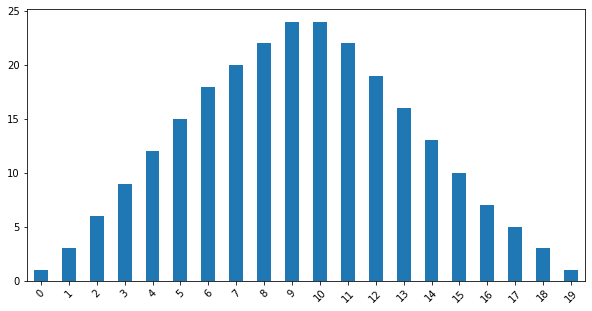

In [5]:
plt.figure (figsize=(10,5))

df.Count.plot.bar(x='Group', y='Count', rot=45)

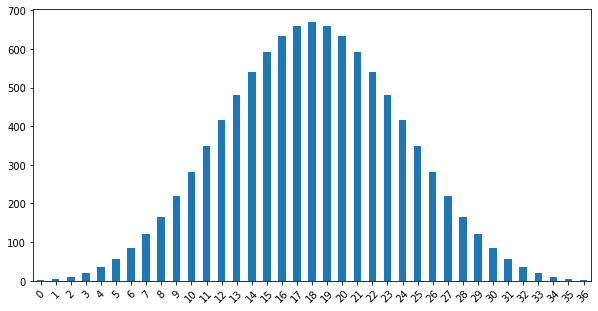

In [6]:
test_2 = count_customers(10000)

df = pd.DataFrame.from_dict (test_2, orient='index'). reset_index()

df.columns = ['Group', 'Count']

plt.figure (figsize=(10,5))

df.Count.plot.bar(x='Group', y='Count', rot=45)

Первая функция работает корректно.

Теперь смоделируем пример из задания, где ID состоит из 5-7 цифр, и проверим работу второй функции.

In [7]:
df.head(15)

,Group,Count
0,0,1
1,1,4
2,2,10
3,3,20
4,4,35
5,5,56
6,6,84
7,7,120
8,8,165
9,9,220


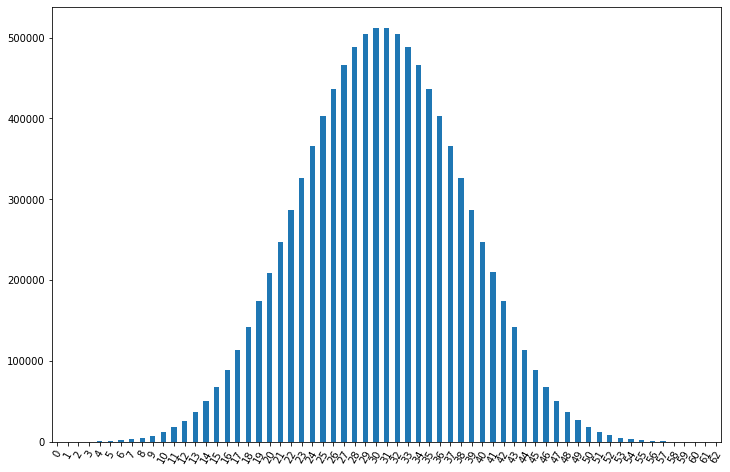

In [8]:
test_3 = count_customers_any(9989999, 10000)

df = pd.DataFrame.from_dict (test_3, orient='index'). reset_index()

df.columns = ['Group', 'Count']

plt.figure (figsize=(12,8))

df.Count.plot.bar(x='Group', y='Count', rot=60)

### Выводы

Видим, что обе функции действительно корректно отрабатывают. Получаем выборки (группы клиентов), размер которых подчиняется нормальному распределению.

Суть задачи состояла в проверке алгоритма группировки клиентов для проведения A/B-тестов. К сожалению, данный алгорим рапределения клиентов по группам использовать нельзя. Для проведения A/B-тестов необходимо, чтобы выборки имели одинаковый размер (размер выборки зависит от требуемой достоверности и мощности проводиомго теста).